In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.4, random_state=101)

In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
predictions = lm.predict(X_test)

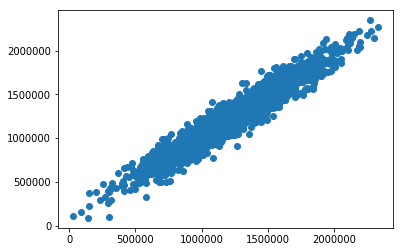

In [7]:
plt.scatter(y_test,predictions)

In [8]:
mean_squared_error(y_test, predictions)

10460958907.209236

In [9]:
X_train.shape

(3000, 5)

In [10]:
from maxvolpy.maxvol import rect_maxvol

In [11]:
r2_scores_rec = []
r2_scores_ran = []

rectmaxvol_accuracies = []
random_accuracies = []


for n in np.arange(100, 2000, 100):
    index = np.random.choice(X_train.shape[0], n, replace=False)
    X_train_random = X_train[index]
    y_train_random = y_train[index]
    
    lm = LinearRegression()
    lm.fit(X_train_random, y_train_random)
    y_pred = lm.predict(X_test)
    r2_scores_ran.append(r2_score(y_test, y_pred))
    accuracy = lm.score(X_test, y_test)
    random_accuracies.append(accuracy)
    
    piv, C = rect_maxvol(X_train, minK=n, maxK=n)
    X_train_rectmaxvol = X_train[piv]
    y_train_rectmaxvol = y_train[piv]
    
    lm = LinearRegression()
    lm.fit(X_train_rectmaxvol, y_train_rectmaxvol)
    y_pred = lm.predict(X_test)
    r2_scores_rec.append(r2_score(y_test, y_pred))
    accuracy = lm.score(X_test, y_test)
    rectmaxvol_accuracies.append(accuracy)

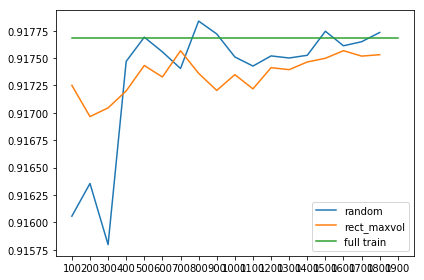

In [12]:
plt.plot(r2_scores_ran[1:], label = "random")
plt.plot(r2_scores_rec[1:], label = "rect_maxvol")
plt.plot([0.917682400964922]*len(np.arange(100, 2000, 100)), label = "full train")
plt.legend()
a = range(len(np.arange(100, 2000, 100)))
c = np.arange(100, 2000, 100)
plt.xticks(a, c)
plt.tight_layout()
plt.show()

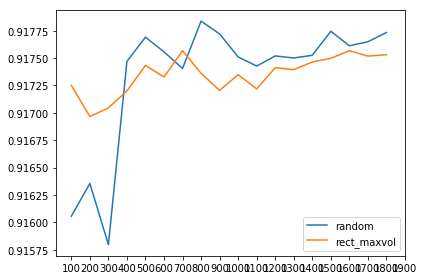

In [13]:
plt.plot(random_accuracies[1:], label = "random")
plt.plot(rectmaxvol_accuracies[1:], label = "rect_maxvol")
a = range(len(np.arange(100, 2000, 100)))
c = np.arange(100, 2000, 100)
plt.xticks(a, c)
plt.tight_layout()
plt.legend()
plt.show()

In [15]:
rectmaxvol_mse = []
random_mse = []


for n in np.arange(100, 2000, 100):
    index = np.random.choice(X_train.shape[0], n, replace=False)
    X_train_random = X_train[index]
    y_train_random = y_train[index]
    
    lm = LinearRegression()
    lm.fit(X_train_random, y_train_random)
    y_pred = lm.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    random_mse.append(mse)
    
    piv, C = rect_maxvol(X_train, minK=n, maxK=n)
    X_train_rectmaxvol = X_train[piv]
    y_train_rectmaxvol = y_train[piv]
    
    lm = LinearRegression()
    lm.fit(X_train_rectmaxvol, y_train_rectmaxvol)
    y_pred = lm.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rectmaxvol_mse.append(mse)

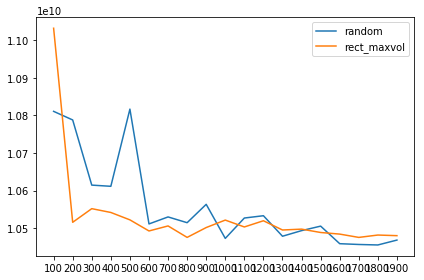

In [16]:
plt.plot(random_mse, label = "random")
plt.plot(rectmaxvol_mse, label = "rect_maxvol")
a = range(len(np.arange(100, 2000, 100)))
c = np.arange(100, 2000, 100)
plt.xticks(a, c)
plt.tight_layout()
plt.legend()
plt.show()